u.data     -- The full u data set, 100000 ratings by 943 users on 1682 items.
              Each user has rated at least 20 movies.  Users and items are
              numbered consecutively from 1.  The data is randomly
              ordered. This is a tab separated list of
	         user id | item id | rating | timestamp.
              The time stamps are unix seconds since 1/1/1970 UTC   

u.info     -- The number of users, items, and ratings in the u data set.

u.item     -- Information about the items (movies); this is a tab separated
              list of
              movie id | movie title | release date | video release date |
              IMDb URL | unknown | Action | Adventure | Animation |
              Children's | Comedy | Crime | Documentary | Drama | Fantasy |
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
              Thriller | War | Western |
              The last 19 fields are the genres, a 1 indicates the movie
              is of that genre, a 0 indicates it is not; movies can be in
              several genres at once.
              The movie ids are the ones used in the u.data data set.

u.genre    -- A list of the genres.

u.user     -- Demographic information about the users; this is a tab
              separated list of
              user id | age | gender | occupation | zip code
              The user ids are the ones used in the u.data data set.

u.occupation -- A list of the occupations.

Citation for dataset

F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. https://doi.org/10.1145/2827872

### (Colab only) Drive mount

In [179]:
# from google.colab import drive
# drive.mount('/content/drive')

### Import Libraries

In [1]:
import numpy as np
import pandas as pd

### Load Dataset

For user-movie rating data:

In [2]:
data_dir = '/Users/reiner/Documents/GitHub/Multi-Armed-Bandit/dataset/u.data'

df = pd.read_csv(data_dir, sep="\t", header=None)
df.columns=['user_id', 'item_id', 'rating', 'timestamp']
df.drop('timestamp', axis=1, inplace=True)
df.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [3]:
df.describe()

,user_id,item_id,rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


> <pre>
> Analytics:
> * We have 100,0000 data entry that denotes user_id and item_id pair
> * We have 943 unique user (user_id: 1 - 943)
> * We have 1682 unique item (item_id: 1 - 1682)
> </pre>

For user context feature:

In [4]:
user_data_dir = '/Users/reiner/Documents/GitHub/Multi-Armed-Bandit/dataset/u.user'

user = pd.read_csv(user_data_dir, sep="|", header=None)
user.columns=['user_id', 'age', 'gender', 'occupation','zip code']
user.drop('zip code', axis=1, inplace=True)
user.head()

,user_id,age,gender,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [5]:
print(user.describe())
print()
print(user.gender.describe())
print()
print(user.occupation.describe())

          user_id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000

count     943
unique      2
top         M
freq      670
Name: gender, dtype: object

count         943
unique         21
top       student
freq          196
Name: occupation, dtype: object


> <pre>
> User Analytics:
>     * The user age ranges from 7-73 years old with average of 34 years old
>     * The gender of the user is only divided into M or F                  (most entry: Male    | 670 / 943 entries)
>     * The occupation of the user is divided into 21 unique groups         (most entry: student | 196 / 943 entries)
> </pre>

Merging the 2 data to compile all context: 

In [6]:
combined_df = df.merge(user, how='left')
combined_df.head()

,user_id,item_id,rating,age,gender,occupation
0,196,242,3,49,M,writer
1,186,302,3,39,F,executive
2,22,377,1,25,M,writer
3,244,51,2,28,M,technician
4,166,346,1,47,M,educator


### One-Hot Encoder

One-hot encoder only applies to categorical feature.

In [7]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(combined_df[['gender', 'occupation']])

encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['gender', 'occupation']))

for col in encoded.columns:
  encoded[col]=encoded[col].astype(int)

encoded.head()

,gender_F,gender_M,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,occupation_healthcare,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Concat the previous data and replace the categorical value with one-hot encode result.

In [8]:
user_feature = pd.concat([combined_df['age'], encoded], ignore_index=False, sort=False, axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
user_feature['age'] = scaler.fit_transform(user_feature[['age']])

user_feature.head()

,age,gender_F,gender_M,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,1.386383,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.521524,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,-0.689280,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.429822,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1.213412,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Clustering (Funk Singular Value Decomposition)

Creating pivot table using user_id and item_pair

In [9]:
user_movie_matrix = df.pivot(index='user_id', columns='item_id', values='rating')
user_movie_matrix

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Notice how not every entry is filled which will cause incomplete and sparsity in the data, there for we will fill the NaN value using the FSVD method

FSVD method step:
1. Create m*k matrix as the user feature matrix
2. Create k*n matrix as the movie feature matrix

k denotes the factor dimension, we use 10 which is derived from the number of clustering we will apply. Both of these matrices will be filled with a random value that is very small and close to 0.

In [10]:
rows, cols = user_movie_matrix.shape
cluster = 10

user_feature_matrix = np.random.rand(rows, cluster)
print(user_feature_matrix.shape)

movie_feature_matrix = np.random.rand(cluster, cols)
print(movie_feature_matrix.shape)


(943, 10)
(10, 1682)


3. Iterate through the previous pivot table and update the value based on existing data to apply correlations to the nan value

In [11]:
# Hyperparameters for the learning process
learning_rate = 0.01

# Perform matrix factorization using SGD
for user_id_idx in range(rows):
    for item_id_idx in range(cols):
        
        rating = user_movie_matrix.iloc[user_id_idx, item_id_idx]
        
        if not np.isnan(rating):
            # Get the corresponding feature vectors
            user_features = user_feature_matrix[user_id_idx, :]
            movie_features = movie_feature_matrix[:, item_id_idx]

            # Predict the rating
            prediction = np.dot(user_features, movie_features)

            # # Calculate the error
            error = rating - prediction

            # # Update the feature vectors using gradient descent
            user_feature_matrix[user_id_idx, :] += learning_rate * 2 * error * movie_features
            movie_feature_matrix[:, item_id_idx] += learning_rate * 2 * error * user_features

print("\nUpdated user_feature_matrix:")
print(user_feature_matrix)
print("\nUpdated movie_feature_matrix:")
print(movie_feature_matrix)


Updated user_feature_matrix:
[[0.88153159 0.58597044 0.69847995 ... 0.47323887 0.71373594 0.88299965]
 [1.0214503  0.24513718 0.83516141 ... 0.6990199  0.46107067 1.05577458]
 [0.39049745 0.65602959 0.6027359  ... 0.83226994 0.77785661 0.72219849]
 ...
 [0.76747322 0.54815843 0.35462339 ... 0.39018169 0.78198356 0.44639765]
 [0.42797086 0.73719663 0.38314269 ... 0.70863445 0.68146565 0.47658839]
 [0.65030977 0.70449696 0.32551218 ... 0.6257677  0.67672272 0.41375203]]

Updated movie_feature_matrix:
[[0.78596026 0.73674689 0.73300475 ... 0.84838595 0.86712229 0.53130022]
 [0.85156839 0.41885961 0.88665749 ... 0.71580721 0.4558696  0.42722771]
 [0.72967071 0.17815261 0.60607553 ... 0.11818781 0.15849396 0.26804932]
 ...
 [0.83095022 0.96676594 0.27471065 ... 0.27197368 0.55297737 0.17598961]
 [0.39703117 0.82754095 0.87058356 ... 0.20619576 0.37812707 0.17762991]
 [0.65479699 0.63000738 0.88076583 ... 0.02532114 0.903144   0.4982298 ]]


We have updated the value for both matrices. Now the intution is that we are going to multiply these 2 matrices to get (m x k) x (k x n) = (m x n) matrix.

The (m x n) matrix represents the prediction of ratings from user for each item.

In [46]:
prediction = np.dot(user_feature_matrix, movie_feature_matrix)
pd.DataFrame(prediction).head()

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,4.611563,3.965572,3.798931,4.160779,3.937572,3.904145,5.063971,4.433240,4.786690,4.389584,...,2.809189,2.614780,2.354142,2.586431,2.669271,2.886129,3.228867,2.446772,3.886974,2.465202
1,5.183441,4.505135,4.026556,4.652429,4.663042,3.945571,5.570558,5.381941,5.236408,5.246558,...,2.770909,2.562928,2.515969,3.294865,3.426572,3.130788,3.558882,2.740515,4.643520,2.798574
2,4.368901,3.866991,3.672314,3.883892,3.964980,3.486707,4.672519,4.625788,4.659476,4.127439,...,3.088339,2.633407,2.437582,2.262531,2.755618,2.744337,3.139127,1.904548,3.593017,2.397029
3,5.679574,4.870291,4.524295,4.957293,4.890896,4.766910,6.037939,5.775189,6.134755,5.158736,...,3.705514,3.648317,2.879234,2.899492,3.240296,3.318355,4.052478,2.668150,4.364164,2.916340
4,3.443060,2.831333,2.307039,3.230204,2.950691,3.035805,3.560678,3.625196,3.515995,3.038612,...,1.968708,2.157984,1.554038,2.061108,2.104787,2.835787,1.961975,1.615535,2.562699,1.471188


In [59]:
# Method 1: Clipping
# prediction = np.clip(prediction, 0, 5)

# Method 2: Scaling with MinMax
prediction_min = prediction.min(axis=1, keepdims=True)
prediction_max = prediction.max(axis=1, keepdims=True)

normalized_prediction = (prediction - prediction_min) / (prediction_max - prediction_min + 1e-8)

# Scale from 0-5
# scaled_prediction = normalized_prediction * 5
# scale to 1-5
scaled_prediction = normalized_prediction * 4 + 1

# Rounding to nearest int
# np.round(scaled_prediction)

prediction_df = pd.DataFrame(scaled_prediction)
prediction_df.head()

print(f'New data ranges from {np.round(scaled_prediction.min())} - {np.round(scaled_prediction.max())}')

New data ranges from 1.0 - 5.0


In [ ]:
pd.DataFrame(prediction).describe()

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,4.611563,3.965572,3.798931,4.160779,3.937572,3.904145,5.063971,4.433240,4.786690,4.389584,...,2.809189,2.614780,2.354142,2.586431,2.669271,2.886129,3.228867,2.446772,3.886974,2.465202
1,5.183441,4.505135,4.026556,4.652429,4.663042,3.945571,5.570558,5.381941,5.236408,5.246558,...,2.770909,2.562928,2.515969,3.294865,3.426572,3.130788,3.558882,2.740515,4.643520,2.798574
2,4.368901,3.866991,3.672314,3.883892,3.964980,3.486707,4.672519,4.625788,4.659476,4.127439,...,3.088339,2.633407,2.437582,2.262531,2.755618,2.744337,3.139127,1.904548,3.593017,2.397029
3,5.679574,4.870291,4.524295,4.957293,4.890896,4.766910,6.037939,5.775189,6.134755,5.158736,...,3.705514,3.648317,2.879234,2.899492,3.240296,3.318355,4.052478,2.668150,4.364164,2.916340
4,3.443060,2.831333,2.307039,3.230204,2.950691,3.035805,3.560678,3.625196,3.515995,3.038612,...,1.968708,2.157984,1.554038,2.061108,2.104787,2.835787,1.961975,1.615535,2.562699,1.471188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,5.760737,4.790317,4.808278,4.509948,4.868795,4.621368,5.819062,5.794522,5.719672,5.935122,...,3.702212,3.044326,3.092925,2.935642,3.672114,3.709487,3.634524,3.210370,4.723117,3.258534
939,3.811841,3.514203,2.839782,3.426695,3.419562,3.196404,4.080549,4.177867,4.031762,3.590311,...,2.888405,2.414406,2.239217,1.869690,2.252487,2.407742,2.945662,1.497283,3.079668,2.092361
940,4.127990,3.755861,3.469946,3.577215,3.613236,3.312914,4.322040,4.331385,4.059580,4.195628,...,2.526561,2.102300,2.125998,2.421546,2.524787,2.764194,2.658837,2.445399,3.731110,2.177866
941,4.973789,4.371010,3.557602,4.383320,4.144306,4.285787,5.018455,5.179152,4.935923,4.596590,...,3.184219,2.723972,2.396464,2.765503,2.605355,3.421037,3.275025,2.816027,4.183996,2.463772


After scaling

In [ ]:
prediction_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,3.831475,3.197942,3.034514,3.389384,3.170482,3.137699,4.275160,3.656592,4.003226,3.613777,...,2.063857,1.873198,1.617585,1.845395,1.926637,2.139314,2.475442,1.708429,3.120860,1.726504
1,3.828610,3.225179,2.799427,3.356214,3.365656,2.727383,4.172996,4.005198,3.875730,3.884760,...,1.682385,1.497362,1.455586,2.148504,2.265673,2.002539,2.383378,1.655346,3.348288,1.706996
2,3.875659,3.322594,3.108074,3.341217,3.430569,2.903551,4.210223,4.158728,4.195850,3.609586,...,2.464580,1.963280,1.747497,1.554604,2.097948,2.085517,2.520545,1.160136,3.020695,1.702811
3,3.931821,3.297854,3.026812,3.366009,3.313995,3.216869,4.212553,4.006722,4.288396,3.523813,...,2.385404,2.340598,1.738122,1.753992,2.020967,2.082116,2.657205,1.572766,2.901370,1.767190
4,3.846908,3.109935,2.478296,3.590471,3.253730,3.356270,3.988608,4.066335,3.934775,3.359652,...,2.070694,2.298723,1.571125,2.182012,2.234634,3.115301,2.062582,1.645213,2.786300,1.471311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,3.914645,3.116886,3.131651,2.886400,3.181400,2.977997,3.962592,3.942418,3.880886,4.058002,...,2.222381,1.681549,1.721501,1.592202,2.197638,2.228361,2.166736,1.818049,3.061642,1.857643
939,3.788504,3.448760,2.678930,3.348872,3.340730,3.086003,4.095226,4.206311,4.039537,3.535635,...,2.734431,2.193375,1.993403,1.571599,2.008550,2.185769,2.799788,1.146508,2.952752,1.825772
940,3.853033,3.446852,3.134775,3.251859,3.291176,2.963373,4.064840,4.075040,3.778363,3.926861,...,2.105065,1.641980,1.667847,1.990439,2.103128,2.364441,2.249444,2.016475,3.419837,1.724462
941,3.901054,3.335961,2.573408,3.347501,3.123431,3.256067,3.942928,4.093578,3.865555,3.547438,...,2.223369,1.791896,1.484864,1.830831,1.680695,2.445381,2.308497,1.878196,3.160639,1.547964


Some of the prediction have value above 5 which doesn't make any sense. But this is normal as we initialized the matrices with randomized value. We have the option to use non linear activations like softmax to scale it to 0-5. Or another approach is to clip the items with ratings above 5 to keep it at 5.

### Cluster the user-movie pairs into 10 different clusters

Having all the projected user preference about the item, we can cluster the users into 10 big clusters.

In [74]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=5)
user_clusters = kmeans.fit_predict(prediction_df)

#user_feature['user_cluster'] = user_clusters

# Print first 5 entry
print(user_clusters)
print(user_clusters.shape)

[8 9 2 0 5 8 4 7 8 3 4 2 4 6 8 8 7 6 9 9 8 1 8 9 7 8 5 2 2 2 7 3 3 9 6 2 9
 4 0 7 0 6 2 8 3 9 8 9 1 3 7 7 7 2 7 3 8 0 4 9 6 2 4 2 9 0 3 4 9 6 6 1 3 4
 7 3 0 7 6 1 2 1 3 3 2 2 1 4 1 2 2 6 5 8 7 5 3 2 1 5 7 2 2 1 8 6 6 8 4 4 8
 2 4 8 7 4 3 1 2 0 1 4 1 4 8 6 5 3 4 2 4 5 0 3 1 2 1 9 9 4 8 6 9 6 1 0 1 5
 8 4 7 6 3 2 7 9 0 9 1 3 9 9 6 9 8 5 7 0 2 5 3 6 4 7 1 5 9 7 7 0 3 6 1 7 1
 7 1 8 7 5 9 2 2 0 7 3 3 2 4 3 5 7 6 5 1 0 5 6 6 0 6 1 1 8 7 7 1 5 6 5 5 8
 2 2 4 4 1 8 7 1 2 7 9 7 1 2 9 1 6 0 1 6 6 9 7 3 1 4 4 2 4 6 3 4 0 6 4 4 3
 8 3 4 2 0 3 4 0 2 2 7 4 6 5 2 7 9 4 9 9 4 7 4 8 3 5 9 6 1 1 1 2 7 7 1 9 4
 4 2 8 4 1 5 6 3 4 2 4 8 3 2 3 2 7 8 4 7 0 2 3 2 9 9 9 1 8 7 4 1 5 9 2 1 2
 9 3 9 4 2 9 1 7 6 9 3 1 8 6 4 5 6 0 9 7 4 8 9 8 6 7 1 6 3 7 9 1 9 1 5 3 8
 9 2 7 9 6 7 8 0 9 2 3 7 1 6 3 3 2 0 4 0 6 3 1 5 8 9 8 8 1 3 8 9 0 4 4 2 4
 7 8 4 5 5 1 5 1 1 4 5 8 7 2 5 7 2 3 1 9 7 8 3 2 3 4 9 1 8 2 0 3 9 3 4 7 9
 1 8 1 7 4 9 2 2 4 1 7 5 6 3 5 3 3 7 9 5 2 3 2 4 4 3 3 4 3 0 0 4 2 8 3 0 8
 9 5 8 3 0 7 0 1 2 4 0 7 

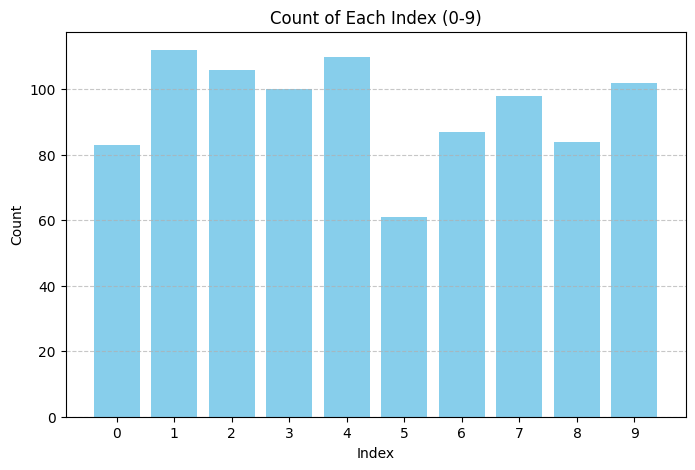

In [65]:
import matplotlib.pyplot as plt
count = np.bincount(user_clusters, minlength=10)
labels = np.arange(10)

plt.figure(figsize=(8,5))
plt.bar(labels, count, color='skyblue')
plt.xlabel('Index')
plt.ylabel('Count')
plt.title('Count of Each Index (0-9)')
plt.xticks(labels)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [67]:
pd.DataFrame(user_clusters).describe()

,0
count,100000.000000
mean,4.832560
std,2.830177
min,0.000000
25%,2.000000
50%,5.000000
75%,7.000000
max,9.000000


### LinUCB Model

In [71]:
import numpy as np

class LinUCB:
  def __init__(self, n_arms, context_dim, alpha):
    self.n_arms = n_arms
    self.context_dim = context_dim
    self.alpha = alpha
    self.A = [np.identity(context_dim) for arm in range(n_arms)]
    self.b = [np.zeros(context_dim) for arm in range(n_arms)]

  def select_arm(self, context):
    p_vals = []
    for i in range(self.n_arms):
        A_inv = np.linalg.inv(self.A[i])
        theta = A_inv @ self.b[i]
        p = context @ theta + self.alpha * np.sqrt(context @ A_inv @ context)
        p_vals.append(p)
    return np.argmax(p_vals)

  def update(self, arm_idx, context, reward):
    self.A[arm_idx] += np.outer(context, context)
    self.b[arm_idx] += reward * context


In [78]:
print(user_clusters[195])
print(user_clusters[185])

3
7


In [72]:
n_training = int(combined_df.shape[0]*0.9)

training_df = combined_df.iloc[:n_training]
testing_df = combined_df.iloc[n_training:]

In [73]:
training_df

,user_id,item_id,rating,age,gender,occupation
0,8,242,3,49,M,writer
1,1,302,3,39,F,executive
2,5,377,1,25,M,writer
3,0,51,2,28,M,technician
4,3,346,1,47,M,educator
...,...,...,...,...,...,...
89995,8,328,5,50,M,writer
89996,6,23,4,24,M,engineer
89997,8,497,3,42,M,other
89998,2,89,2,29,M,student


In [11]:
# Remove later
combined_df.head()

,user_id,item_id,rating,age,gender,occupation
0,196,242,3,49,M,writer
1,186,302,3,39,F,executive
2,22,377,1,25,M,writer
3,244,51,2,28,M,technician
4,166,346,1,47,M,educator


In [12]:
num_arms = len(combined_df['item_id'].unique())

linucb = LinUCB(num_arms, 0.5)

optimal_reward = 0
cumulative_reward = 0

rewards = []  # to store rewards for plotting
regrets = []  # to store regrets for plotting

for row_idx in range(combined_df.shape[0]):

  movie_id = combined_df.iloc[[row_idx]].item_id.iloc[0]

  selected_arm = linucb.choose_arm(user_clusters[row_idx])

  if selected_arm == movie_id:
    reward = combined_df.iloc[[row_idx]].rating.iloc[0]

  else:
    reward = 0

  # Update LinUCB model
  linucb.update(user_clusters, reward, selected_arm)

  # Track cumulative reward and optimal reward
  cumulative_reward += reward
  optimal_reward += combined_df.iloc[[row_idx]].rating.iloc[0]

regret = optimal_reward - cumulative_reward
print(f"Cumulative Reward: {cumulative_reward}")
print(f"Cumulative Regret: {regret}")


'''
import matplotlib.pyplot as plt


# Plot the cumulative rewards and regret
plt.figure(figsize=(12, 6))

# Plot cumulative reward
plt.subplot(1, 2, 1)
plt.plot(rewards, label="LinUCB Cumulative Reward")
plt.xlabel("Steps")
plt.ylabel("Cumulative Reward")
plt.title("LinUCB Cumulative Reward")
plt.legend()

# Plot cumulative regret
plt.subplot(1, 2, 2)
plt.plot(regrets, label="LinUCB Cumulative Regret", color="red")
plt.xlabel("Steps")
plt.ylabel("Cumulative Regret")
plt.title("LinUCB Cumulative Regret")
plt.legend()

plt.tight_layout()
plt.show()
'''

/var/folders/9_/fy5p9d_52f9d3dxp8df05zlc0000gn/T/ipykernel_31143/3606379614.py:15: RuntimeWarning: invalid value encountered in divide
  theta = self.b[arm_idx] / self.A[arm_idx]
/var/folders/9_/fy5p9d_52f9d3dxp8df05zlc0000gn/T/ipykernel_31143/3606379614.py:19: RuntimeWarning: divide by zero encountered in divide
  confidence_bound = self.alpha * np.sqrt(1/self.A[arm_idx])


ValueError: setting an array element with a sequence.

In [ ]:
'''
import numpy as np

class LinUCB:
    def __init__(self, num_arms, context_dim, alpha=0.5):
        self.num_arms = num_arms
        self.context_dim = context_dim
        self.alpha = alpha
        self.A = [np.identity(context_dim) for _ in range(num_arms)]
        self.b = [np.zeros((context_dim,)) for _ in range(num_arms)]

    def select_arm(self, context):
        scores = []
        for i in range(self.num_arms):
            A_inv = np.linalg.inv(self.A[i])
            theta = A_inv @ self.b[i]
            ucb = theta @ context + self.alpha * np.sqrt(context @ A_inv @ context)
            scores.append(ucb)
        return np.argmax(scores)

    def update(self, chosen_arm, context, reward):
        self.A[chosen_arm] += np.outer(context, context)
        self.b[chosen_arm] += reward * context


# Initialize the LinUCB model
num_arms = len(data['movieId'].unique())  # Number of unique movies (arms)
context_dim = user_context_with_cluster.shape[1]  # User context + user cluster
linucb = LinUCB(num_arms, context_dim)

# === 4. Simulate Recommendations and Updates ===
rewards = []
ratings['reward'] = ratings['rating'].apply(lambda x: 1 if x >= 4 else 0)  # Define reward

for _, row in ratings.iterrows():
    user_id = row['userId']
    movie_id = row['movieId']
    reward = row['reward']

    # Get user context (continuous age + one-hot encoded gender and occupation + cluster info)
    user_context_for_user = user_context_with_cluster[user_id - 1]  # Adjusting for 0-indexed

    # Select the best movie (arm) using LinUCB
    chosen_arm = linucb.select_arm(user_context_for_user)

    # Update the LinUCB model with feedback
    linucb.update(chosen_arm, user_context_for_user, reward)

    rewards.append(reward)
  '''

NameError: name 'data' is not defined

In [ ]:
'''
class LinUCB_Bandit:
  def __init__(self, mean, variance):
    # Hidden properties from the user
    self.mean = mean
    self.variance = variance

    self.number_being_selected = 0        # number of times the bandit is selected in total
    self.sum_of_reward = 0                # sum of rewards of the bandit
    self.ucb_value = 0

  def average_rewards(self):
    average_reward = self.sum_of_reward / self.number_being_selected

    return average_reward

  # The agent choose a bandit, so the bandit regenerate number as a reward to be returned
  def roll_a_number(self):
    rand_result = random.gauss(self.mean, math.sqrt(self.variance))

    # print(f'rolled a get number of {rand_result}')

    # Add sum of reward with the rolled number
    self.sum_of_reward += rand_result

    # Increment the number of being selected
    self.number_being_selected += 1

    self.update_ucb_value()

    return rand_result

  def update_linucb_value(self):
    self.ucb_value = self.average_rewards() + math.sqrt(2 * math.log(current_round) / self.number_being_selected)

'''

In [ ]:
'''
import numpy as np

# Initialize variables for the bandit simulation
n_movies = len(df['continuousId'].unique())  # Number of unique movies (arms)
n_users = len(df['userId'].unique())         # Number of unique users
arms_rewards = np.zeros(n_movies)          # Track reward sums for each movie (arm)
arms_counts = np.zeros(n_movies)           # Track how many times each movie (arm) was chosen

# Simulate the Contextual Bandit for each user
rewards = []
epsilon = 0.1  # Epsilon-greedy exploration rate

# Loop over each user
for user_id in range(n_users):
    user_data = df[df['userId'] == user_id]

    # Loop over each movie the user rated
    for _, row in user_data.iterrows():
        movie_id = row['continuousId']
        context = row[mlb.classes_].values  # Movie's genre context (binary vector)

        # Epsilon-greedy strategy: Explore vs Exploit
        if np.random.rand() < epsilon:
            arm = np.random.choice(range(n_movies))  # Random arm (movie)
        else:
            avg_rewards = arms_rewards / (arms_counts + 1e-5)  # Avoid division by zero
            arm = np.argmax(avg_rewards)  # Best arm based on average reward

        # Get the reward (binary: 1 if liked, 0 if disliked)
        reward = 1 if row['rating'] >= 4 else 0

        # Update the reward and counts for the chosen movie (arm)
        arm_index = movie_id - 1  # Assuming movieId is 1-indexed
        arms_counts[arm_index] += 1
        arms_rewards[arm_index] += reward

        rewards.append(reward)

# Track cumulative reward over rounds
cumulative_rewards = np.cumsum(rewards)

# Plotting the cumulative reward
import matplotlib.pyplot as plt

plt.plot(cumulative_rewards)
plt.xlabel('Round')
plt.ylabel('Cumulative Reward')
plt.title('Contextual Bandit Learning Curve (MovieLens)')
plt.show()
'''

In [ ]:
'''
combined_df = pd.concat([combined_df, encoded], ignore_index=False, sort=False, axis=1)
combined_df.head()
'''

In [ ]:
'''
combined_df.drop('gender', axis=1, inplace=True)
combined_df.drop('occupation', axis=1, inplace=True)
combined_df.head()
'''

In [ ]:
'''
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
combined_df['age'] = scaler.fit_transform(combined_df[['age']])

combined_df.head()
'''

In [ ]:
'''
movie = pd.read_csv("/content/drive/MyDrive/AI Planning/u.item", sep='|', header=None, encoding='latin-1')


movie.columns=['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation',
               'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
               'Sci-Fi', 'Thriller', 'War', 'Western']

movie.drop('release date', axis=1, inplace=True)
movie.drop('video release date', axis=1, inplace=True)
movie.drop('IMDb URL', axis=1, inplace=True)
movie.drop('unknown', axis=1, inplace=True)

movie.head()
'''